Rewards per repetition: {1: [19.0, 22.0, 49.0, 2.0, 10.0, 0.0, 20.0, 22.0, 8.0, 6.0, 4.0, 3.0, 21.0, 7.0, 2.0, 1.0, 0.0, 5.0, 8.0, 4.0, 1.0, 9.0, 1.0, 0.0, 1.0, 3.0, 7.0, 14.0, 8.0, 4.0, 2.0, 3.0, 3.0, 5.0, 4.0, 0.0, 8.0, 14.0, 4.0, 1.0, 0.0, 2.0, 1.0, 4.0, 18.0, 2.0, 1.0, 3.0, 2.0, 1.0, 0.0, 6.0, 14.0, 1.0, 7.0, 4.0, 20.0, 2.0, 17.0, 3.0, 13.0, 1.0, 4.0, 1.0, 4.0, 1.0, 7.0, 13.0, 10.0, 7.0, 21.0, 12.0, 13.0, 10.0, 3.0, 4.0, 2.0, 5.0, 11.0, 3.0, 1.0, 0.0, 18.0, 6.0, 0.0, 0.0, 4.0, 3.0, 12.0, 1.0, 24.0, 5.0, 2.0, 2.0, 5.0, 5.0, 9.0, 10.0, 5.0, 10.0], 2: [0.0, 2.0, 6.0, 19.0, 21.0, 0.0, 0.0, 10.0, 10.0, 1.0, 4.0, 0.0, 6.0, 14.0, 9.0, 21.0, 2.0, 3.0, 6.0, 10.0, 1.0, 1.0, 14.0, 5.0, 7.0, 3.0, 6.0, 1.0, 3.0, 13.0, 6.0, 1.0, 11.0, 3.0, 0.0, 26.0, 0.0, 1.0, 1.0, 2.0, 10.0, 13.0, 3.0, 10.0, 10.0, 6.0, 4.0, 2.0, 0.0, 18.0, 9.0, 9.0, 1.0, 1.0, 4.0, 0.0, 12.0, 11.0, 2.0, 5.0, 9.0, 7.0, 16.0, 21.0, 2.0, 1.0, 0.0, 5.0, 10.0, 1.0, 1.0, 5.0, 12.0, 14.0, 3.0, 10.0, 3.0, 2.0, 9.0, 5.0, 8.0, 1.0, 3.0, 2

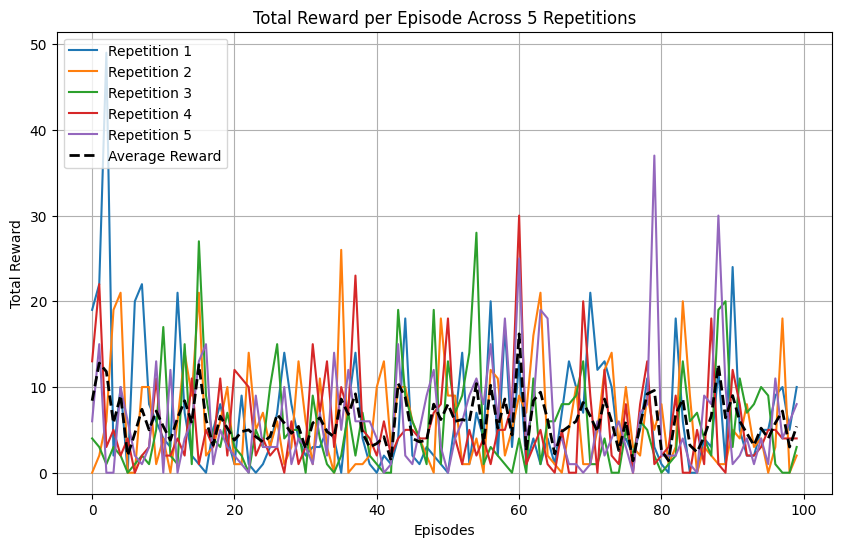

In [28]:
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve

text = """
Repetition	Episode	Total Reward	Q Value Before	Q Value After	Priority
1.0	1.0	19.0			1.0
1.0	2.0	22.0			1.0
1.0	3.0	49.0	1.0314936637878400	1.0126895904541000	1.0
1.0	4.0	2.0	0.7874184846878050	0.7854994535446170	1.0
1.0	5.0	10.0	0.9102259278297420	0.9047945737838750	1.0
1.0	6.0	0.0	0.6211347579956060	0.6187534332275390	1.0
1.0	7.0	20.0	0.6318392157554630	0.6305477023124700	1.0
1.0	8.0	22.0	0.6157928705215450	0.6154187917709350	1.0
1.0	9.0	8.0	0.567112147808075	0.5659167170524600	1.0
1.0	10.0	6.0	0.666262149810791	0.6655890345573430	1.0
1.0	11.0	4.0	0.8074023127555850	0.8054195642471310	1.0
1.0	12.0	3.0	0.9314452409744260	0.9324939250946050	1.0
1.0	13.0	21.0	0.5634539127349850	0.5613915920257570	1.0
1.0	14.0	7.0	0.6099777221679690	0.6063106656074520	1.0
1.0	15.0	2.0	0.574971616268158	0.5711526870727540	1.0
1.0	16.0	1.0	0.6026644706726070	0.5985932946205140	1.0
1.0	17.0	0.0	0.5316174626350400	0.529807448387146	1.0
1.0	18.0	5.0	0.6382196545600890	0.6401833295822140	1.0
1.0	19.0	8.0	0.586513876914978	0.5860975384712220	1.0
1.0	20.0	4.0	0.7221167087554930	0.7203171849250790	1.0
1.0	21.0	1.0	0.6907936334609990	0.6894306540489200	1.0
1.0	22.0	9.0	0.7268141508102420	0.7244328260421750	1.0
1.0	23.0	1.0	0.6426318883895870	0.6413342952728270	1.0
1.0	24.0	0.0	0.6266433000564580	0.6248003244400020	1.0
1.0	25.0	1.0	0.7785564661026000	0.7803349494934080	1.0
1.0	26.0	3.0	0.7221566438674930	0.7205101847648620	1.0
1.0	27.0	7.0	0.6819987297058110	0.6856738328933720	1.0
1.0	28.0	14.0	0.6172930598258970	0.6165891885757450	1.0
1.0	29.0	8.0	0.7144547700881960	0.7116475701332090	1.0
1.0	30.0	4.0	0.7018270492553710	0.6990565061569210	1.0
1.0	31.0	2.0	0.7955948114395140	0.792792797088623	1.0
1.0	32.0	3.0	0.718774676322937	0.7172646522521970	1.0
1.0	33.0	3.0	0.7772351503372190	0.7747067213058470	1.0
1.0	34.0	5.0	0.5899649262428280	0.586814284324646	1.0
1.0	35.0	4.0	0.7138357162475590	0.712258517742157	1.0
1.0	36.0	0.0	0.7896780967712400	0.7869745492935180	1.0
1.0	37.0	8.0	0.6638585925102230	0.6623060703277590	1.0
1.0	38.0	14.0	0.7600535154342650	0.7567164301872250	1.0
1.0	39.0	4.0	0.6448083519935610	0.6453712582588200	1.0
1.0	40.0	1.0	0.750770628452301	0.7473042607307430	1.0
1.0	41.0	0.0	0.6542140245437620	0.6497734785079960	1.0
1.0	42.0	2.0	0.7464076280593870	0.7475879788398740	1.0
1.0	43.0	1.0	0.6964273452758790	0.6939525008201600	1.0
1.0	44.0	4.0	0.7764581441879270	0.7750662565231320	1.0
1.0	45.0	18.0	0.5973358154296880	0.5990796089172360	1.0
1.0	46.0	2.0	0.6966205835342410	0.6923409104347230	1.0
1.0	47.0	1.0	0.7088299989700320	0.7050580978393560	1.0
1.0	48.0	3.0	0.6860525608062740	0.6838151216506960	1.0
1.0	49.0	2.0	0.6171746253967290	0.6193221807479860	1.0
1.0	50.0	1.0	0.8004055023193360	0.7956112027168270	1.0
1.0	51.0	0.0	0.6919767260551450	0.6905973553657530	1.0
1.0	52.0	6.0	0.6978705525398250	0.6952419281005860	1.0
1.0	53.0	14.0	0.829991340637207	0.8266122341156010	1.0
1.0	54.0	1.0	0.7969560623168950	0.7951903939247130	1.0
1.0	55.0	7.0	0.6647100448608400	0.6652494668960570	1.0
1.0	56.0	4.0	0.6973668932914730	0.6959261298179630	1.0
1.0	57.0	20.0	0.854568362236023	0.8513368368148800	1.0
1.0	58.0	2.0	0.7454808950424190	0.7443920969963070	1.0
1.0	59.0	17.0	0.6985080242156980	0.6953079104423520	1.0
1.0	60.0	3.0	0.7093930244445800	0.7077388167381290	1.0
1.0	61.0	13.0	0.6835682988166810	0.6819355487823490	1.0
1.0	62.0	1.0	0.6204501390457150	0.6195714473724370	1.0
1.0	63.0	4.0	0.802179753780365	0.7990755438804630	1.0
1.0	64.0	1.0	0.7334021329879760	0.7331744432449340	1.0
1.0	65.0	4.0	0.7005516290664670	0.6993363499641420	1.0
1.0	66.0	1.0	0.7236883640289310	0.7226225733757020	1.0
1.0	67.0	7.0	0.8159022331237790	0.8113424777984620	1.0
1.0	68.0	13.0	0.6840112209320070	0.6836279630661010	1.0
1.0	69.0	10.0	0.6048030257225040	0.6034291386604310	1.0
1.0	70.0	7.0	0.8255856037139890	0.8232121467590330	1.0
1.0	71.0	21.0	0.6221003532409670	0.6206976771354680	1.0
1.0	72.0	12.0	0.7654548287391660	0.7652055621147160	1.0
1.0	73.0	13.0	0.6160181164741520	0.6140396595001220	1.0
1.0	74.0	10.0	0.6954481601715090	0.6936646103858950	1.0
1.0	75.0	3.0	0.7499992251396180	0.749172031879425	1.0
1.0	76.0	4.0	0.7028585076332090	0.6996880769729610	1.0
1.0	77.0	2.0	0.7295719981193540	0.729046642780304	1.0
1.0	78.0	5.0	0.7528032064437870	0.7484869360923770	1.0
1.0	79.0	11.0	0.7407528162002560	0.7374120950698850	1.0
1.0	80.0	3.0	0.6977167725563050	0.6999398469924930	1.0
1.0	81.0	1.0	0.9138962626457210	0.9120703935623170	1.0
1.0	82.0	0.0	0.8212706446647640	0.8164842128753660	1.0
1.0	83.0	18.0	0.6842616200447080	0.6843016147613530	1.0
1.0	84.0	6.0	0.6481196880340580	0.6499969959259030	1.0
1.0	85.0	0.0	0.6988804936409000	0.697990357875824	1.0
1.0	86.0	0.0	0.6869151592254640	0.6838110089302060	1.0
1.0	87.0	4.0	0.649315595626831	0.6488632559776310	1.0
1.0	88.0	3.0	0.6774912476539610	0.6756584048271180	1.0
1.0	89.0	12.0	0.7765253782272340	0.7783916592597960	1.0
1.0	90.0	1.0	0.6353009939193730	0.6359966993331910	1.0
1.0	91.0	24.0	0.7205696702003480	0.7172741293907170	1.0
1.0	92.0	5.0	0.7175267934799190	0.7176958918571470	1.0
1.0	93.0	2.0	0.8231398463249210	0.8212267160415650	1.0
1.0	94.0	2.0	0.7451528906822210	0.7422531843185430	1.0
1.0	95.0	5.0	0.7860658168792730	0.7882193922996520	1.0
1.0	96.0	5.0	0.6757256984710690	0.6749991178512570	1.0
1.0	97.0	9.0	0.6736676692962650	0.6729313135147100	1.0
1.0	98.0	10.0	0.6356770396232610	0.6347541213035580	1.0
1.0	99.0	5.0	0.6433725953102110	0.644392728805542	1.0
1.0	100.0	10.0	0.6715752482414250	0.6719103455543520	1.0
2.0	1.0	0.0	0.7022978067398070	0.7018114328384400	1.0
2.0	2.0	2.0	0.7435704469680790	0.7445560693740850	1.0
2.0	3.0	6.0	0.7379422187805180	0.7350416779518130	1.0
2.0	4.0	19.0	0.7799344062805180	0.7789715528488160	1.0
2.0	5.0	21.0	0.7070284485816960	0.7065044641494750	1.0
2.0	6.0	0.0	0.7243320941925050	0.7225379943847660	1.0
2.0	7.0	0.0	0.7378879189491270	0.7366625666618350	1.0
2.0	8.0	10.0	0.684154748916626	0.6839190125465390	1.0
2.0	9.0	10.0	0.727118968963623	0.724399745464325	1.0
2.0	10.0	1.0	0.7296130061149600	0.7271692156791690	1.0
2.0	11.0	4.0	0.712799072265625	0.7123210430145260	1.0
2.0	12.0	0.0	0.6916499137878420	0.6903859376907350	1.0
2.0	13.0	6.0	0.723675012588501	0.7250036001205440	1.0
2.0	14.0	14.0	0.7644544243812560	0.7653029561042790	1.0
2.0	15.0	9.0	0.813438892364502	0.8114758133888250	1.0
2.0	16.0	21.0	0.6566877961158750	0.6566752195358280	1.0
2.0	17.0	2.0	0.8112650513648990	0.8098886013031010	1.0
2.0	18.0	3.0	0.7222724556922910	0.7208883762359620	1.0
2.0	19.0	6.0	0.6857187151908880	0.6847729682922360	1.0
2.0	20.0	10.0	0.6730926036834720	0.6721568703651430	1.0
2.0	21.0	1.0	0.6327536702156070	0.6315972208976750	1.0
2.0	22.0	1.0	0.6593844294548040	0.6568485498428350	1.0
2.0	23.0	14.0	0.8091804385185240	0.8084943890571590	1.0
2.0	24.0	5.0	0.6524063944816590	0.6512646675109860	1.0
2.0	25.0	7.0	0.7117896676063540	0.71138995885849	1.0
2.0	26.0	3.0	0.6731600761413570	0.6722420454025270	1.0
2.0	27.0	6.0	0.7255187630653380	0.7238885164260860	1.0
2.0	28.0	1.0	0.7515878677368160	0.7475930452346800	1.0
2.0	29.0	3.0	0.7350958585739140	0.7336323857307430	1.0
2.0	30.0	13.0	0.7393844723701480	0.7395731210708620	1.0
2.0	31.0	6.0	0.6890431046485900	0.6876732707023620	1.0
2.0	32.0	1.0	0.7126486897468570	0.7116059064865110	1.0
2.0	33.0	11.0	0.665614128112793	0.6662880182266240	1.0
2.0	34.0	3.0	0.6880183219909670	0.6868674755096440	1.0
2.0	35.0	0.0	0.6492213606834410	0.6466291546821590	1.0
2.0	36.0	26.0	0.6386809945106510	0.6397731304168700	1.0
2.0	37.0	0.0	0.7216157913208010	0.7211270928382870	1.0
2.0	38.0	1.0	0.7126875519752500	0.7117829918861390	1.0
2.0	39.0	1.0	0.6475393176078800	0.6484526991844180	1.0
2.0	40.0	2.0	0.7463153004646300	0.745856761932373	1.0
2.0	41.0	10.0	0.6927187442779540	0.6909494400024410	1.0
2.0	42.0	13.0	0.7874748110771180	0.7852655053138730	1.0
2.0	43.0	3.0	0.739000141620636	0.7380245327949520	1.0
2.0	44.0	10.0	0.6675848364830020	0.6672402620315550	1.0
2.0	45.0	10.0	0.7183265686035160	0.7170353531837460	1.0
2.0	46.0	6.0	0.7835626602172850	0.7821638584136960	1.0
2.0	47.0	4.0	0.6728019714355470	0.6718028783798220	1.0
2.0	48.0	2.0	0.6173519492149350	0.6163622140884400	1.0
2.0	49.0	0.0	0.723730206489563	0.721733570098877	1.0
2.0	50.0	18.0	0.7051368951797490	0.7041299343109130	1.0
2.0	51.0	9.0	0.7816764712333680	0.7814071178436280	1.0
2.0	52.0	9.0	0.6826316118240360	0.6818426251411440	1.0
2.0	53.0	1.0	0.7109876871109010	0.7105843424797060	1.0
2.0	54.0	1.0	0.7292627096176150	0.7288700938224790	1.0
2.0	55.0	4.0	0.74720698595047	0.7465481758117680	1.0
2.0	56.0	0.0	0.748439371585846	0.7464516758918760	1.0
2.0	57.0	12.0	0.6246253848075870	0.6255925893783570	1.0
2.0	58.0	11.0	0.7162513136863710	0.7160918116569520	1.0
2.0	59.0	2.0	0.6999050974845890	0.6990135312080380	1.0
2.0	60.0	5.0	0.6495152115821840	0.649161696434021	1.0
2.0	61.0	9.0	0.6596136689186100	0.6586458086967470	1.0
2.0	62.0	7.0	0.6900246143341060	0.6899043321609500	1.0
2.0	63.0	16.0	0.6360337138175960	0.6354679465293880	1.0
2.0	64.0	21.0	0.7551189661026000	0.7539043426513670	1.0
2.0	65.0	2.0	0.6987611055374150	0.6993238925933840	1.0
2.0	66.0	1.0	0.6296823620796200	0.6294814348220830	1.0
2.0	67.0	0.0	0.7325382828712460	0.7310039401054380	1.0
2.0	68.0	5.0	0.7347173690795900	0.7341844439506530	1.0
2.0	69.0	10.0	0.7338700890541080	0.7334427237510680	1.0
2.0	70.0	1.0	0.7082770466804500	0.7076802253723150	1.0
2.0	71.0	1.0	0.696574866771698	0.6953380107879640	1.0
2.0	72.0	5.0	0.7476333379745480	0.7470138072967530	1.0
2.0	73.0	12.0	0.6845162510871890	0.6826189160346990	1.0
2.0	74.0	14.0	0.6804659366607670	0.6784829497337340	1.0
2.0	75.0	3.0	0.7118334174156190	0.7097522616386410	1.0
2.0	76.0	10.0	0.6558507084846500	0.6555574536323550	1.0
2.0	77.0	3.0	0.6381489634513860	0.6374557614326480	1.0
2.0	78.0	2.0	0.6333089470863340	0.6317163705825810	1.0
2.0	79.0	9.0	0.7390816807746890	0.7388059496879580	1.0
2.0	80.0	5.0	0.7349865436553960	0.7337384223937990	1.0
2.0	81.0	8.0	0.7159896492958070	0.7143535017967220	1.0
2.0	82.0	1.0	0.6654380559921270	0.6637763977050780	1.0
2.0	83.0	3.0	0.6759364604949950	0.6746399402618410	1.0
2.0	84.0	20.0	0.7224262952804570	0.722274661064148	1.0
2.0	85.0	9.0	0.6910110116004940	0.6894912719726560	1.0
2.0	86.0	0.0	0.6712856292724610	0.669934868812561	1.0
2.0	87.0	3.0	0.6744953393936160	0.6729281544685360	1.0
2.0	88.0	2.0	0.6745736598968510	0.6745218634605410	1.0
2.0	89.0	1.0	0.7108631730079650	0.7090194225311280	1.0
2.0	90.0	1.0	0.6482735872268680	0.6472654938697820	1.0
2.0	91.0	5.0	0.6134817600250240	0.6129794120788570	1.0
2.0	92.0	4.0	0.6846874356269840	0.6832830905914310	1.0
2.0	93.0	8.0	0.7069622278213500	0.7043996453285220	1.0
2.0	94.0	3.0	0.754464328289032	0.7541660666465760	1.0
2.0	95.0	4.0	0.6487759351730350	0.6495267748832700	1.0
2.0	96.0	0.0	0.6691502928733830	0.66866534948349	1.0
2.0	97.0	3.0	0.7327959537506100	0.7338956594467160	1.0
2.0	98.0	18.0	0.7464221715927120	0.7454350590705870	1.0
2.0	99.0	0.0	0.7298521995544430	0.7281429171562200	1.0
2.0	100.0	2.0	0.7240234613418580	0.7232022881507870	1.0
3.0	1.0	4.0	0.6814735531806950	0.6807689666748050	1.0
3.0	2.0	3.0	0.6814126968383790	0.6819472908973690	1.0
3.0	3.0	1.0	0.6663450002670290	0.6641377806663510	1.0
3.0	4.0	3.0	0.7716312408447270	0.7692418098449710	1.0
3.0	5.0	2.0	0.7726618051528930	0.7722629904747010	1.0
3.0	6.0	0.0	0.7430917620658880	0.7409061789512630	1.0
3.0	7.0	1.0	0.7062621116638180	0.7038743495941160	1.0
3.0	8.0	2.0	0.6616986989974980	0.6604534387588500	1.0
3.0	9.0	1.0	0.6837923526763920	0.6838113069534300	1.0
3.0	10.0	5.0	0.7782126665115360	0.7770165205001830	1.0
3.0	11.0	17.0	0.7481896281242370	0.7476544380187990	1.0
3.0	12.0	2.0	0.6730613112449650	0.6730318665504460	1.0
3.0	13.0	1.0	0.6939601898193360	0.6929062008857730	1.0
3.0	14.0	15.0	0.6822935938835140	0.6810947060585020	1.0
3.0	15.0	1.0	0.6495115756988530	0.6486933827400210	1.0
3.0	16.0	27.0	0.6456158757209780	0.6440373659133910	1.0
3.0	17.0	9.0	0.7175020575523380	0.7161425948143010	1.0
3.0	18.0	4.0	0.6298726797103880	0.6291176676750180	1.0
3.0	19.0	3.0	0.6753750443458560	0.6749805808067320	1.0
3.0	20.0	7.0	0.5969082117080690	0.5964396595954900	1.0
3.0	21.0	3.0	0.6369706988334660	0.636348307132721	1.0
3.0	22.0	2.0	0.619375467300415	0.619804322719574	1.0
3.0	23.0	0.0	0.6092737317085270	0.6072878837585450	1.0
3.0	24.0	5.0	0.6026450395584110	0.6018814444541930	1.0
3.0	25.0	3.0	0.6392471194267270	0.6391545534133910	1.0
3.0	26.0	10.0	0.6109969019889830	0.6109470725059510	1.0
3.0	27.0	15.0	0.8051886558532720	0.8038108944892880	1.0
3.0	28.0	4.0	0.7397788763046270	0.7392660975456240	1.0
3.0	29.0	5.0	0.6027513742446900	0.6040176153182980	1.0
3.0	30.0	5.0	0.66633141040802	0.6664788722991940	1.0
3.0	31.0	0.0	0.6909976005554200	0.6899620890617370	1.0
3.0	32.0	9.0	0.633965253829956	0.632750928401947	1.0
3.0	33.0	4.0	0.6919536590576170	0.6908605098724370	1.0
3.0	34.0	1.0	0.6291306614875790	0.6296098828315740	1.0
3.0	35.0	0.0	0.6598345041275020	0.6597075462341310	1.0
3.0	36.0	2.0	0.6411303281784060	0.6402609348297120	1.0
3.0	37.0	7.0	0.6585060954093930	0.6589320302009580	1.0
3.0	38.0	2.0	0.6376543045043950	0.636319100856781	1.0
3.0	39.0	7.0	0.5888029336929320	0.5880473256111150	1.0
3.0	40.0	2.0	0.7171791791915890	0.7173792719841000	1.0
3.0	41.0	1.0	0.6016262173652650	0.6003255844116210	1.0
3.0	42.0	0.0	0.7363166213035580	0.7344039678573610	1.0
3.0	43.0	0.0	0.5710569024086000	0.5706110596656800	1.0
3.0	44.0	19.0	0.741777241230011	0.7407441735267640	1.0
3.0	45.0	9.0	0.6993463039398190	0.6979513168334960	1.0
3.0	46.0	6.0	0.7857787013053890	0.7864668965339660	1.0
3.0	47.0	4.0	0.6074365973472600	0.6061586141586300	1.0
3.0	48.0	1.0	0.6443886160850530	0.6434752941131590	1.0
3.0	49.0	19.0	0.7200287580490110	0.719685971736908	1.0
3.0	50.0	1.0	0.6740372776985170	0.6725746989250180	1.0
3.0	51.0	13.0	0.6751444935798650	0.67626953125	1.0
3.0	52.0	7.0	0.6922034025192260	0.6897076368331910	1.0
3.0	53.0	9.0	0.6865368485450750	0.685742974281311	1.0
3.0	54.0	14.0	0.6993668675422670	0.6974163055419920	1.0
3.0	55.0	28.0	0.7186912894248960	0.7180918455123900	1.0
3.0	56.0	1.0	0.7818416953086850	0.7800806164741520	1.0
3.0	57.0	3.0	0.6944834589958190	0.6935952305793760	1.0
3.0	58.0	2.0	0.705500602722168	0.7045666575431820	1.0
3.0	59.0	1.0	0.6888108253479000	0.6885731220245360	1.0
3.0	60.0	0.0	0.715653657913208	0.7151778936386110	1.0
3.0	61.0	4.0	0.6928550601005550	0.6924189329147340	1.0
3.0	62.0	0.0	0.644629955291748	0.6438559293746950	1.0
3.0	63.0	11.0	0.5895460844039920	0.5888407230377200	1.0
3.0	64.0	1.0	0.5924420952796940	0.593298614025116	1.0
3.0	65.0	6.0	0.6978616714477540	0.6971442103385930	1.0
3.0	66.0	6.0	0.7191664576530460	0.7180198431015020	1.0
3.0	67.0	8.0	0.6371912956237790	0.6364639401435850	1.0
3.0	68.0	8.0	0.6825332045555120	0.679806113243103	1.0
3.0	69.0	9.0	0.6052703261375430	0.60418301820755	1.0
3.0	70.0	13.0	0.6906547546386720	0.6904332041740420	1.0
3.0	71.0	1.0	0.6711297631263730	0.6707674264907840	1.0
3.0	72.0	1.0	0.6587621569633480	0.657482385635376	1.0
3.0	73.0	4.0	0.6807002425193790	0.6799420118331910	1.0
3.0	74.0	0.0	0.6905948519706730	0.6895893216133120	1.0
3.0	75.0	0.0	0.6698812246322630	0.6692927479743960	1.0
3.0	76.0	5.0	0.6914546489715580	0.6902138590812680	1.0
3.0	77.0	2.0	0.6718142032623290	0.6724136471748350	1.0
3.0	78.0	6.0	0.6622784733772280	0.6614644527435300	1.0
3.0	79.0	5.0	0.6659706234931950	0.6643491983413700	1.0
3.0	80.0	2.0	0.678005576133728	0.6768743991851810	1.0
3.0	81.0	0.0	0.6454296708107000	0.6434545516967770	1.0
3.0	82.0	1.0	0.6359840035438540	0.63457190990448	1.0
3.0	83.0	2.0	0.7067416310310360	0.7048224806785580	1.0
3.0	84.0	13.0	0.7337717413902280	0.7321223020553590	1.0
3.0	85.0	6.0	0.7339696288108830	0.7329795956611630	1.0
3.0	86.0	7.0	0.737177848815918	0.7362216711044310	1.0
3.0	87.0	4.0	0.708958625793457	0.7100245356559750	1.0
3.0	88.0	2.0	0.6917455792427060	0.6907337307929990	1.0
3.0	89.0	19.0	0.7150070071220400	0.7140870094299320	1.0
3.0	90.0	20.0	0.6882491111755370	0.6874340176582340	1.0
3.0	91.0	3.0	0.6550130844116210	0.6546456813812260	1.0
3.0	92.0	11.0	0.6989275813102720	0.6978814601898190	1.0
3.0	93.0	7.0	0.6266291737556460	0.6264796257019040	1.0
3.0	94.0	8.0	0.6993195414543150	0.6978789567947390	1.0
3.0	95.0	10.0	0.5951939225196840	0.5953917503356930	1.0
3.0	96.0	9.0	0.638712465763092	0.6370605230331420	1.0
3.0	97.0	1.0	0.652357816696167	0.6534241437911990	1.0
3.0	98.0	0.0	0.6304943561553960	0.629841685295105	1.0
3.0	99.0	0.0	0.6320914626121520	0.6319631338119510	1.0
3.0	100.0	3.0	0.6401978135108950	0.6395782232284550	1.0
4.0	1.0	13.0	0.651252031326294	0.6491648554801940	1.0
4.0	2.0	22.0	0.6444862484931950	0.6439998149871830	1.0
4.0	3.0	3.0	0.6168330907821660	0.6159531474113460	1.0
4.0	4.0	5.0	0.6391680836677550	0.6371062994003300	1.0
4.0	5.0	2.0	0.6406418085098270	0.6400705575942990	1.0
4.0	6.0	4.0	0.6829913854599000	0.6825184226036070	1.0
4.0	7.0	0.0	0.7184792757034300	0.7175335884094240	1.0
4.0	8.0	2.0	0.6212431192398070	0.6214213371276860	1.0
4.0	9.0	3.0	0.6379991769790650	0.636494517326355	1.0
4.0	10.0	11.0	0.6562175154685970	0.6570261716842650	1.0
4.0	11.0	2.0	0.6761887073516850	0.6752592921257020	1.0
4.0	12.0	2.0	0.6897367238998410	0.688732922077179	1.0
4.0	13.0	4.0	0.6602643132209780	0.6588407754898070	1.0
4.0	14.0	2.0	0.6856826543807980	0.6851009726524350	1.0
4.0	15.0	11.0	0.7091822028160100	0.7081916928291320	1.0
4.0	16.0	1.0	0.7180691361427310	0.7162683010101320	1.0
4.0	17.0	5.0	0.7770371437072750	0.7755712270736690	1.0
4.0	18.0	3.0	0.7841181755065920	0.7834384441375730	1.0
4.0	19.0	11.0	0.6403874754905700	0.6414482593536380	1.0
4.0	20.0	2.0	0.6631417870521550	0.6601365804672240	1.0
4.0	21.0	12.0	0.6702831983566280	0.6684315204620360	1.0
4.0	22.0	11.0	0.6348512172698980	0.6345043778419500	1.0
4.0	23.0	10.0	0.658187985420227	0.6592953205108640	1.0
4.0	24.0	2.0	0.6267402172088620	0.6260340809822080	1.0
4.0	25.0	4.0	0.6861207485198980	0.6876398921012880	1.0
4.0	26.0	2.0	0.6588287949562070	0.6581778526306150	1.0
4.0	27.0	3.0	0.6357489228248600	0.6362395286560060	1.0
4.0	28.0	0.0	0.6592282652854920	0.6587827801704410	1.0
4.0	29.0	6.0	0.6533536314964290	0.6517230868339540	1.0
4.0	30.0	1.0	0.6241053342819210	0.6232403516769410	1.0
4.0	31.0	3.0	0.6668317317962650	0.6668123006820680	1.0
4.0	32.0	15.0	0.687140166759491	0.6854101419448850	1.0
4.0	33.0	7.0	0.6699192523956300	0.6681035757064820	1.0
4.0	34.0	13.0	0.748989999294281	0.7481744289398190	1.0
4.0	35.0	3.0	0.5494221448898320	0.5488470792770390	1.0
4.0	36.0	10.0	0.6142997145652770	0.6129359006881710	1.0
4.0	37.0	7.0	0.700019121170044	0.6986140012741090	1.0
4.0	38.0	23.0	0.6569015383720400	0.6566057205200200	1.0
4.0	39.0	5.0	0.6859902739524840	0.6851467490196230	1.0
4.0	40.0	4.0	0.646851658821106	0.6454388499259950	1.0
4.0	41.0	2.0	0.7869235277175900	0.7856516242027280	1.0
4.0	42.0	6.0	0.6672093868255620	0.6654239296913150	1.0
4.0	43.0	2.0	0.6636534929275510	0.6623769402503970	1.0
4.0	44.0	4.0	0.8104725480079650	0.8080727458000180	1.0
4.0	45.0	5.0	0.7466822862625120	0.7457154989242550	1.0
4.0	46.0	5.0	0.739278256893158	0.7373208999633790	1.0
4.0	47.0	4.0	0.686877429485321	0.6862306594848630	1.0
4.0	48.0	4.0	0.7417523860931400	0.7413135170936580	1.0
4.0	49.0	7.0	0.7562410235404970	0.7541988492012020	1.0
4.0	50.0	8.0	0.6362178325653080	0.6356247067451480	1.0
4.0	51.0	18.0	0.5734484791755680	0.5726176500320440	1.0
4.0	52.0	4.0	0.5640749931335450	0.5637809634208680	1.0
4.0	53.0	1.0	0.5798630118370060	0.57939213514328	1.0
4.0	54.0	5.0	0.6417365670204160	0.6413435935974120	1.0
4.0	55.0	2.0	0.7407656311988830	0.7397326231002810	1.0
4.0	56.0	4.0	0.6768409013748170	0.6763543486595150	1.0
4.0	57.0	1.0	0.6271886825561520	0.6264027953147890	1.0
4.0	58.0	5.0	0.6712185740470890	0.6702629923820500	1.0
4.0	59.0	5.0	0.733121931552887	0.7325884103775020	1.0
4.0	60.0	8.0	0.6121562123298650	0.6099134683609010	1.0
4.0	61.0	30.0	0.6404356360435490	0.6388285160064700	1.0
4.0	62.0	1.0	0.7088940739631650	0.7069740891456600	1.0
4.0	63.0	3.0	0.6427334547042850	0.642015814781189	1.0
4.0	64.0	5.0	0.6666076183319090	0.6653178334236150	1.0
4.0	65.0	1.0	0.6133568286895750	0.6121169328689580	1.0
4.0	66.0	0.0	0.6251199841499330	0.6243529319763180	1.0
4.0	67.0	5.0	0.6518541574478150	0.651212215423584	1.0
4.0	68.0	0.0	0.6500810384750370	0.6496096849441530	1.0
4.0	69.0	0.0	0.701887845993042	0.7009152173995970	1.0
4.0	70.0	20.0	0.7329105138778690	0.7320994734764100	1.0
4.0	71.0	9.0	0.6571828722953800	0.6570033431053160	1.0
4.0	72.0	0.0	0.6335635781288150	0.6312413215637210	1.0
4.0	73.0	12.0	0.6194422245025640	0.6184012293815610	1.0
4.0	74.0	2.0	0.6073497533798220	0.6061413884162900	1.0
4.0	75.0	1.0	0.6182361245155330	0.6175152063369750	1.0
4.0	76.0	8.0	0.6844112873077390	0.6829538941383360	1.0
4.0	77.0	0.0	0.6965553760528560	0.6959664225578310	1.0
4.0	78.0	8.0	0.6768060326576230	0.6763878464698790	1.0
4.0	79.0	13.0	0.7113708853721620	0.7104600071907040	1.0
4.0	80.0	1.0	0.6110337972640990	0.6103671789169310	1.0
4.0	81.0	2.0	0.609560489654541	0.6104953289031980	1.0
4.0	82.0	3.0	0.6975501179695130	0.6989527940750120	1.0
4.0	83.0	9.0	0.6829512715339660	0.6812032461166380	1.0
4.0	84.0	0.0	0.654644787311554	0.6519556641578670	1.0
4.0	85.0	0.0	0.6107898950576780	0.6098955273628240	1.0
4.0	86.0	5.0	0.6308696269989010	0.6288769841194150	1.0
4.0	87.0	1.0	0.6239399909973150	0.6238742470741270	1.0
4.0	88.0	18.0	0.6542850732803350	0.6547735333442690	1.0
4.0	89.0	1.0	0.6500542759895330	0.6496675610542300	1.0
4.0	90.0	0.0	0.6655851602554320	0.6642780900001530	1.0
4.0	91.0	12.0	0.6683720946311950	0.667198121547699	1.0
4.0	92.0	8.0	0.6649884581565860	0.6632131338119510	1.0
4.0	93.0	2.0	0.6631861329078670	0.6633432507514950	1.0
4.0	94.0	2.0	0.6538206338882450	0.6530741453170780	1.0
4.0	95.0	3.0	0.6634745001792910	0.6630834341049190	1.0
4.0	96.0	5.0	0.790108859539032	0.7885012626647950	1.0
4.0	97.0	5.0	0.6962770223617550	0.6964455842971800	1.0
4.0	98.0	4.0	0.6159353852272030	0.6158853769302370	1.0
4.0	99.0	4.0	0.605498194694519	0.6045325994491580	1.0
4.0	100.0	4.0	0.6403214335441590	0.6403141021728520	1.0
5.0	1.0	6.0	0.6266453862190250	0.6260143518447880	1.0
5.0	2.0	15.0	0.6795852184295650	0.680476725101471	1.0
5.0	3.0	0.0	0.6969714760780330	0.6945627927780150	1.0
5.0	4.0	0.0	0.6972314119338990	0.6968212127685550	1.0
5.0	5.0	10.0	0.5625601410865780	0.5622559785842900	1.0
5.0	6.0	6.0	0.6674342155456540	0.6672706007957460	1.0
5.0	7.0	2.0	0.6854839324951170	0.6847044825553890	1.0
5.0	8.0	1.0	0.6441170573234560	0.6439178586006170	1.0
5.0	9.0	3.0	0.7018468379974370	0.699309766292572	1.0
5.0	10.0	13.0	0.7527422904968260	0.7519772052764890	1.0
5.0	11.0	0.0	0.7247218489646910	0.723865270614624	1.0
5.0	12.0	12.0	0.6497246623039250	0.6486850380897520	1.0
5.0	13.0	0.0	0.6349719166755680	0.6341113448143010	1.0
5.0	14.0	4.0	0.7148885726928710	0.7139080762863160	1.0
5.0	15.0	6.0	0.7028059959411620	0.7028047442436220	1.0
5.0	16.0	13.0	0.6989160776138310	0.6981096863746640	1.0
5.0	17.0	15.0	0.7071953415870670	0.7065209746360780	1.0
5.0	18.0	1.0	0.6950250864028930	0.6953346729278560	1.0
5.0	19.0	5.0	0.657450795173645	0.6569515466690060	1.0
5.0	20.0	3.0	0.5606964826583860	0.5595598816871640	1.0
5.0	21.0	2.0	0.577587902545929	0.5771020650863650	1.0
5.0	22.0	1.0	0.570941686630249	0.5703088045120240	1.0
5.0	23.0	0.0	0.5711970925331120	0.5703914165496830	1.0
5.0	24.0	9.0	0.6633386015892030	0.6627291440963750	1.0
5.0	25.0	3.0	0.7188978791236880	0.7176623940467830	1.0
5.0	26.0	3.0	0.7373648881912230	0.7366343140602110	1.0
5.0	27.0	3.0	0.7517079710960390	0.7525426149368290	1.0
5.0	28.0	10.0	0.6856922507286070	0.6853981018066410	1.0
5.0	29.0	1.0	0.6757586002349850	0.6739153861999510	1.0
5.0	30.0	4.0	0.6771349310874940	0.6767290234565740	1.0
5.0	31.0	3.0	0.6792096495628360	0.6781038045883180	1.0
5.0	32.0	1.0	0.6760196089744570	0.6754164099693300	1.0
5.0	33.0	7.0	0.7309889793396000	0.729937732219696	1.0
5.0	34.0	2.0	0.6444913148880010	0.6429110169410710	1.0
5.0	35.0	14.0	0.6187652945518490	0.6197526454925540	1.0
5.0	36.0	5.0	0.6281871199607850	0.6275100708007810	1.0
5.0	37.0	12.0	0.6781982183456420	0.6779860854148870	1.0
5.0	38.0	6.0	0.6384280920028690	0.6372134685516360	1.0
5.0	39.0	6.0	0.6516019105911260	0.650360107421875	1.0
5.0	40.0	6.0	0.7090325951576230	0.7082077860832210	1.0
5.0	41.0	4.0	0.6413435935974120	0.640988290309906	1.0
5.0	42.0	0.0	0.6925817131996160	0.6912898421287540	1.0
5.0	43.0	1.0	0.7005913257598880	0.701562762260437	1.0
5.0	44.0	15.0	0.6819462180137630	0.680896520614624	1.0
5.0	45.0	2.0	0.6406891345977780	0.6421374678611760	1.0
5.0	46.0	1.0	0.6561627388000490	0.6544981002807620	1.0
5.0	47.0	5.0	0.5998414754867550	0.5997769832611080	1.0
5.0	48.0	9.0	0.7415615320205690	0.7407165169715880	1.0
5.0	49.0	12.0	0.6508074402809140	0.6514408588409420	1.0
5.0	50.0	3.0	0.6427922248840330	0.6422948241233830	1.0
5.0	51.0	0.0	0.6292832493782040	0.6286374926567080	1.0
5.0	52.0	4.0	0.6410456299781800	0.6401569247245790	1.0
5.0	53.0	6.0	0.677903950214386	0.678523600101471	1.0
5.0	54.0	9.0	0.6788661479949950	0.6774575114250180	1.0
5.0	55.0	11.0	0.6541464924812320	0.6536591649055480	1.0
5.0	56.0	8.0	0.6741846799850460	0.6737627983093260	1.0
5.0	57.0	15.0	0.7604845762252810	0.7604995369911190	1.0
5.0	58.0	6.0	0.7597942352294920	0.7582886219024660	1.0
5.0	59.0	18.0	0.6896471381187440	0.689068078994751	1.0
5.0	60.0	6.0	0.7060614824295040	0.7050908803939820	1.0
5.0	61.0	25.0	0.6974456906318670	0.6964446902275090	1.0
5.0	62.0	4.0	0.6585615873336790	0.6577138304710390	1.0
5.0	63.0	8.0	0.6585303544998170	0.6579843759536740	1.0
5.0	64.0	19.0	0.7002182006835940	0.6977983713150020	1.0
5.0	65.0	18.0	0.6213015913963320	0.6201072335243230	1.0
5.0	66.0	3.0	0.6327527761459350	0.6329717040061950	1.0
5.0	67.0	4.0	0.6066790819168090	0.6052924990653990	1.0
5.0	68.0	1.0	0.6414695382118230	0.6398619413375850	1.0
5.0	69.0	1.0	0.6646348834037780	0.6642076373100280	1.0
5.0	70.0	0.0	0.6225625276565550	0.6218398809432980	1.0
5.0	71.0	1.0	0.6169472336769100	0.617632269859314	1.0
5.0	72.0	6.0	0.6183055639266970	0.6172183752059940	1.0
5.0	73.0	2.0	0.637856125831604	0.6371974945068360	1.0
5.0	74.0	4.0	0.5782477855682370	0.5773212313652040	1.0
5.0	75.0	6.0	0.6682772636413570	0.6666725277900700	1.0
5.0	76.0	3.0	0.6634076237678530	0.6630315780639650	1.0
5.0	77.0	0.0	0.6704864501953130	0.6683887839317320	1.0
5.0	78.0	7.0	0.7171800136566160	0.7159379124641420	1.0
5.0	79.0	8.0	0.707460343837738	0.706912100315094	1.0
5.0	80.0	37.0	0.6766865849494930	0.675916314125061	1.0
5.0	81.0	2.0	0.5827688574790960	0.5837989449501040	1.0
5.0	82.0	2.0	0.5810136795043950	0.5821265578269960	1.0
5.0	83.0	2.0	0.6598674058914190	0.6592952013015750	1.0
5.0	84.0	4.0	0.67275470495224	0.6717029809951780	1.0
5.0	85.0	1.0	0.6850704550743100	0.6825405359268190	1.0
5.0	86.0	0.0	0.6563969850540160	0.6559019684791570	1.0
5.0	87.0	9.0	0.6254948973655700	0.6241587400436400	1.0
5.0	88.0	8.0	0.6381121873855590	0.6392635703086850	1.0
5.0	89.0	30.0	0.6230292916297910	0.6225159168243410	1.0
5.0	90.0	10.0	0.636454164981842	0.6342456340789800	1.0
5.0	91.0	1.0	0.6842991709709170	0.6823720335960390	1.0
5.0	92.0	2.0	0.6119391918182370	0.610791802406311	1.0
5.0	93.0	4.0	0.6310268044471740	0.6296949982643130	1.0
5.0	94.0	1.0	0.7272718548774720	0.7281849980354310	1.0
5.0	95.0	4.0	0.6799174547195440	0.6783335208892820	1.0
5.0	96.0	1.0	0.597194254398346	0.5957335233688350	1.0
5.0	97.0	11.0	0.6423308253288270	0.6414842009544370	1.0
5.0	98.0	4.0	0.7006138563156130	0.7003663182258610	1.0
5.0	99.0	6.0	0.6661527752876280	0.6629539132118230	1.0
5.0	100.0	8.0	0.6378553509712220	0.6367412209510800	1.0
"""
lines = text.strip().split('\n')

repetitions = []
episodes = []
rewards = []

for line in lines[1:]:
    parts = line.split()
    repetition = float(parts[0])
    episode = float(parts[1])
    reward = float(parts[2])

    repetitions.append(repetition)
    episodes.append(episode)
    rewards.append(reward)

rewards_all_runs = {i: [] for i in range(1, 6)}

for rep, reward in zip(repetitions, rewards):
    if 1 <= int(rep) <= 5:
        rewards_all_runs[int(rep)].append(reward)

print(f'Rewards per repetition: {rewards_all_runs}')

plt.figure(figsize=(10, 6))

for repetition in range(1, 6):
    if rewards_all_runs[repetition]:
        plt.plot(rewards_all_runs[repetition], label=f'Repetition {repetition}')
    else:
        print(f'No data for Repetition {repetition}')

max_length = min(len(run) for run in rewards_all_runs.values())
avg_rewards = np.mean([run[:max_length] for run in rewards_all_runs.values()], axis=0)

plt.plot(avg_rewards, label='Average Reward', color='black', linestyle='--', linewidth=2)

plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode Across 5 Repetitions')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()